# Проект: Исследовательский анализ данных

# Исследование объявлений о продаже квартир

У нас есть данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости. 
2. Установить параметры, влияющие на цену объектов. 
3. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

**Ход исследования**

Данные получим из файла `'real_estate_data.csv'` , просмотрим общую информацию о датасете, оценим качество данных.

Далее приступим к предобработке данных: проверим и исправим ошибки, которые не приведут к искажению конечного результата, оценим их влияние на исследование. Также создадим необходимые столбцы, которые помогут в дальнейшем исследовании.

Затем настанет очередь исследовательского анализа данных.

Таким образом, иследование будет состоять из следующих этапов:

- Обзор данных

- Предобработка данных

- Добавление новых столбцов

- Исследовательский анализ данных: обработка аномальных значений, исследование продаж, влияния на стоимость

- Общий вывод

## Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition`— дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

### **Общая информация**

In [2]:
import pandas as pd
import numpy as np
# Импортируем библиотеки для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограмму для всех числовых столбцов таблицы:

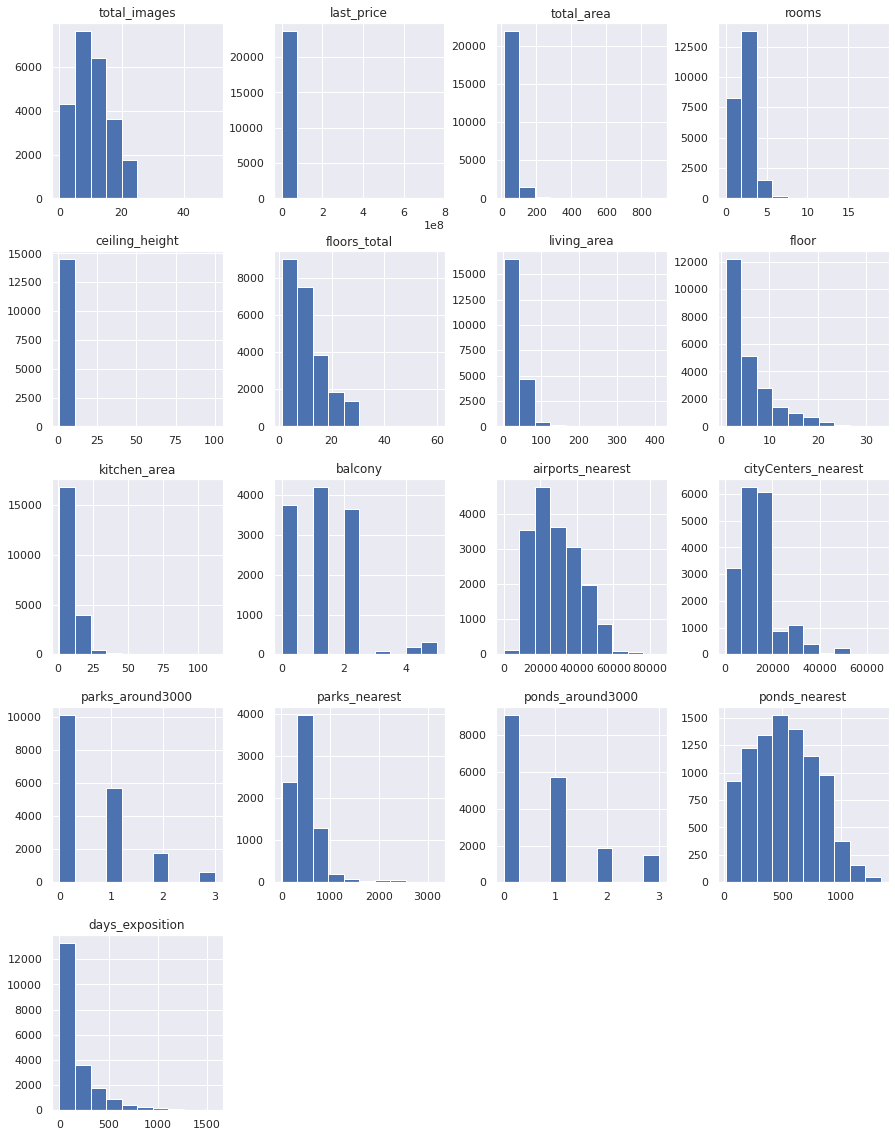

In [5]:
data.hist(figsize=(15, 20));

Всего в нашем датасете 23699 строк и 22 столбца. Данные имеют пропущенные значения.

### **Предобработка данных**

#### **Пропущенные значения**

Определим, в каких столбцах есть пропуски.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Проверим количество пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Заполним пропуски там, где возможно. 

Начнем со столбцов `'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'days_exposition'` - пропуски в них возможно полностью случайные. Вопрос не зависит от характера самого вопроса и от других вопросов. Их можно заполнить **медианным значением**, которое не смещается из-за выдающихся значений. 

In [8]:
data.fillna({'ceiling_height': data['ceiling_height'].median(), 
           'floors_total': data['floors_total'].median(),
           'living_area':data['living_area'].median(),
           'kitchen_area':data['kitchen_area'].median(), 
           'days_exposition':data['days_exposition'].median()}, inplace=True)

In [9]:
# Проверим, все ли пропуски в данных столбцах заполнены.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Теперь рассмотрим колонки `'balcony', 'parks_around3000', 'ponds_around3000'` - эти значения можно **заменить на 0**, потому что если количество балконов, парков, прудов не указано, то скорее всего они отсутствуют. 

In [10]:
data.fillna({'balcony':0,
             'parks_around3000':0,
             'ponds_around3000':0}, inplace=True)

In [11]:
# Проверим, все ли пропуски в данных столбцах заполнены.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

Пропуски категориальных значений в колонках `'locality_name','is_apartment'` возможно полностью случайные. Вопрос не зависит от характера самого вопроса и от других вопросов. Заменим их на **'unknown'**.

In [12]:
data.fillna({'locality_name':'unknown',
             'is_apartment':'unknown'}, inplace=True)

In [13]:
# Проверяем, все ли пропуски заполнены
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

Данные в колонках `'airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest'` были автоматически получены из геосервисов. Следует предполагать, что пропуски в них возможно случайные. Возможно вопрос зависит от местоположения объекта или связан с техническими причинами.


Таким образом, мы заполнили пропущенные значения там, где возможно.

#### **Изменение типов данных, где необходимо**

Заменим вещественный тип данных в столбцах `'last_price','floors_total','balcony','airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition'` на целочисленный с помощью метода `astype()`

In [15]:
data = data.astype({'last_price':'Int64', 'floors_total':'Int64',
                    'balcony':'Int64','airports_nearest':'Int64',
                    'cityCenters_nearest':'Int64','parks_around3000':'Int64',
                    'total_images':'Int64','rooms':'Int64', 'floor':'Int64',
                    'parks_nearest':'Int64','ponds_around3000':'Int64',
                    'ponds_nearest':'Int64','days_exposition':'Int64'},errors='ignore')

Почему нужно изменить тип данных: значения в столбцах имеют нулевую дробную часть, поэтому хранить их в виде вещественных нет смысла.

#### **Неявные дубликаты**

Изучим уникальные значения, явные и неявные дубликаты в столбце с названиями.

In [16]:
# Выведем отсротированные уникальные значения в столбце названий
sorted(data['locality_name'].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

In [17]:
# Устраним неявные дубликаты
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('поселок городского типа','пгт')
    .str.replace('городской поселок','пгт')
    .str.replace('коттеджный поселок','п.')
    .str.replace('поселок станции','п.')
    .str.replace('посёлок при железнодорожной станции','п.')
    .str.replace('поселок','п.')
    .str.replace('садовое товарищество','пгт')
    .str.replace('деревня','п.')
    .str.replace('село','с.')
    .replace(['п. Мурино', 'дер. Кудрово','п. Любань','с. Никольское','с. Павлово','дер. Федоровское','пгт Рябово',
              'п. при железнодорожной станции Вещево','п. при железнодорожной станции Приветнинское','п. Кудрово','п. Федоровское'],
             ['Мурино','Кудрово','Любань','Никольское','пгт Павлово','пгт Федоровское','п. Рябово','п. Вещево',
              'п. Приветнинское','Кудрово','пгт Федоровское'])
) 

In [18]:
# Проверим количество явных дубликатов 
data.duplicated().sum()

0

В данных отсутствуют явные дубликаты, однако в столбце с названиями населенных пунктов достаточно много неявных дубликатов, например «поселок Тельмана» и «посёлок Тельмана». 

Мы обработали их с помощью замены обозначений населенных пунктов, а также вручную прошлись по оставшимся названиям.

### Добавьте в таблицу новые столбцы

- цена одного квадратного метра;

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

- месяц публикации объявления;

- год публикации объявления;

- тип этажа квартиры (значения — «первый», «последний», «другой»);

- расстояние до центра города в километрах.

In [19]:
# Добавляем столбец с ценой одного квадратного метра
data['one_square_meter_price'] = (data['last_price']/data['total_area']).apply(np.round)

In [20]:
# Переводим столбец в формат даты и времени
data['first_day_exposition_datetime'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [21]:
# Добавляем столбец с днем недели публикации объявления
data['first_day_exposition_weekday'] = data['first_day_exposition_datetime'].dt.weekday

In [22]:
# Добавляем столбец с месяцем публикации объявления
data['first_day_exposition_month'] = data['first_day_exposition_datetime'].dt.month

In [23]:
# Добавляем столбец с годом публикации объявления
data['first_day_exposition_year'] = data['first_day_exposition_datetime'].dt.year

In [24]:
# Определяем функцию для категоризации данных об этажах квартиры
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floors_total == floor:
        return 'последний'
    else:
        return 'другой'

In [25]:
# Применяем функцию ко всем строкам 
data['floor_group'] = data.apply(floor_group,axis=1)
# Проверяем работу функции путем вызова уникальных значений столбца
data['floor_group'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [26]:
# Добавляем столбец с расстоянием до центра города в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).apply(lambda x: round(x) if pd.notna(x) else np.nan)

### Проведите исследовательский анализ данных

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров.

**Список параметров:**

- общая площадь;

- жилая площадь;

- площадь кухни;

- цена объекта;

- количество комнат;

- высота потолков;

- тип этажа квартиры («первый», «последний», «другой»);

- общее количество этажей в доме;

- расстояние до центра города в метрах;

- расстояние до ближайшего парка

In [27]:
# Напишем функцию для визуализации параметров
def hist_plot(column, bins, title1, xlabel, xlim_right, ylim_top, title2):
    plt.subplot (1, 2, 1)

    data[column].hist(bins=bins, figsize=(25,10))
    plt.title(title1)
    plt.xlabel(xlabel)
    plt.ylabel('Количество значений')


    plt.subplot (1, 2, 2)

    data[column].hist(bins=bins, figsize=(25,10))
    plt.grid(True, linestyle='--', color='green', alpha=0.2, which='minor')
    plt.minorticks_on()
    plt.tick_params(which='minor')
    plt.ticklabel_format(axis = 'both', style = 'plain')
    plt.ylim(0, ylim_top)
    plt.xlim(0,xlim_right)
    plt.title(title2)
    plt.xlabel(xlabel)

##### **Общая площадь**

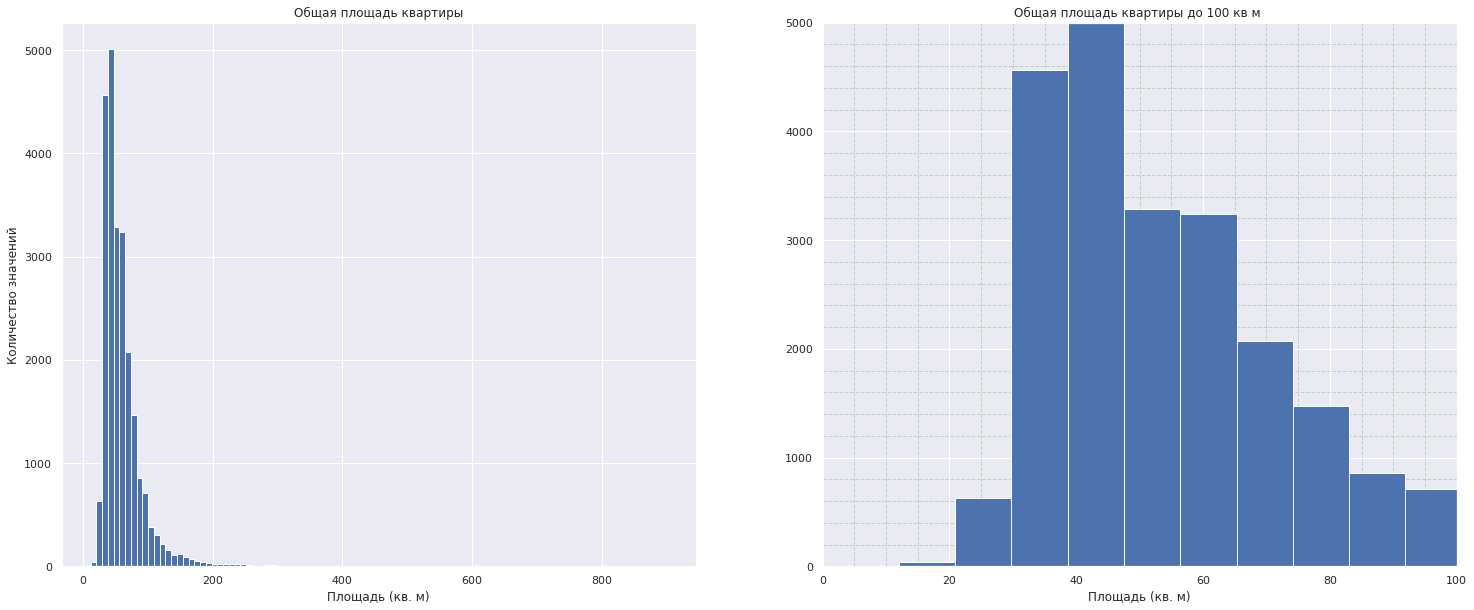

In [28]:
# Строим гистограмму для столбца 'total_area'
hist_plot('total_area', 100, 'Общая площадь квартиры', 
          'Площадь (кв. м)', 100, 5000, 'Общая площадь квартиры до 100 кв м ')

Минимальный разрешённый размер квартиры-студии по нормам СНиП — 19 м² (14 м² жилая площадь и 5 м² кухня). В данном параметре встречаются выбивающиеся значения, ограничим выборку стартовой площадью 19м$^2$.

In [29]:
data = data.drop(data[data['total_area'] < 19].index)

##### **Жилая площадь**

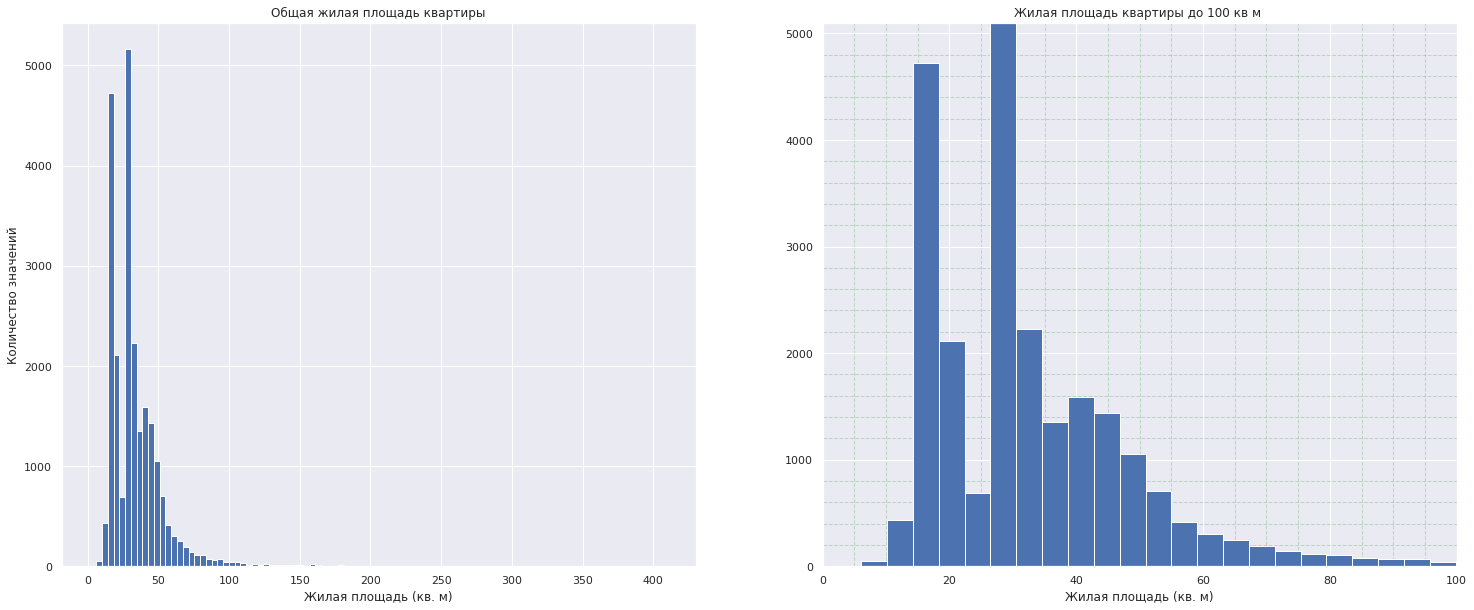

In [30]:
# Строим гистограмму для столбца 'living_area'
hist_plot('living_area', 100, 'Общая жилая площадь квартиры', 
          'Жилая площадь (кв. м)', 100, 5100, 'Жилая площадь квартиры до 100 кв м ')

В данном параметре встречаются выбивающиеся значения, ограничим выборку стартовой жилой площадью 14м$^2$

In [31]:
data = data.drop(data[data['living_area'] < 14].index)

##### **Площадь кухни**

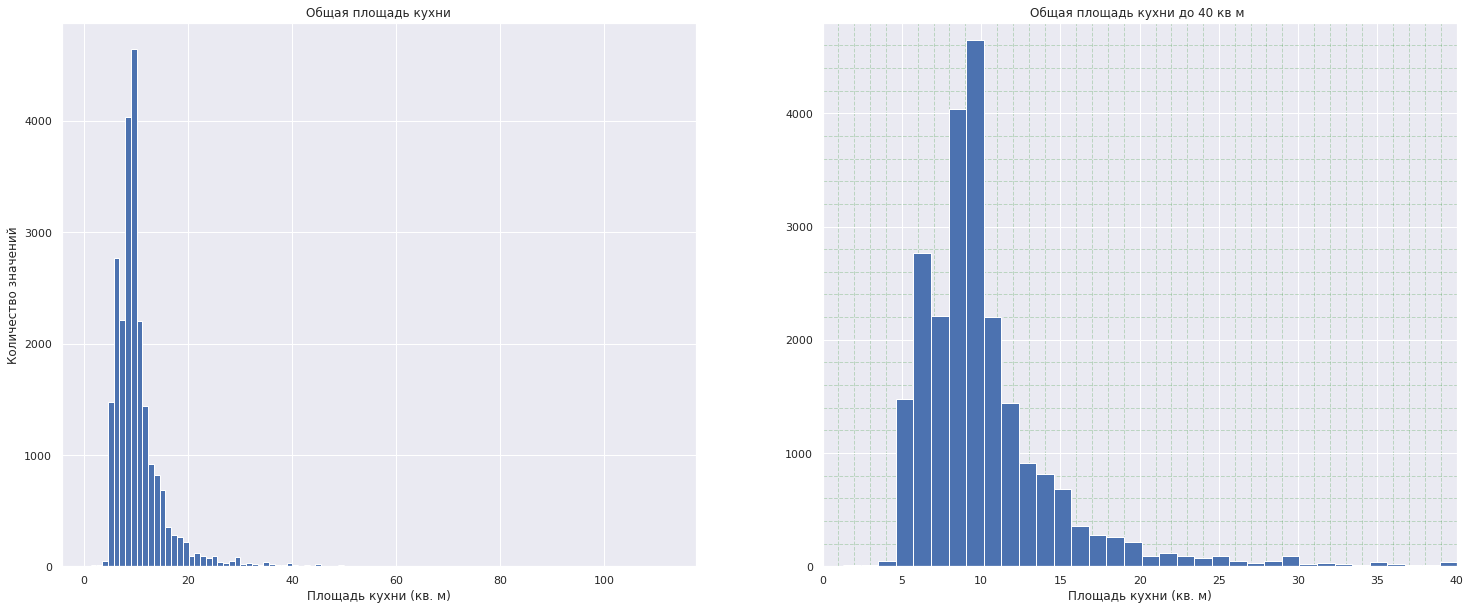

In [32]:
# Строим гистограмму для столбца 'kitchen_area'
hist_plot('kitchen_area', 100, 'Общая площадь кухни', 
          'Площадь кухни (кв. м)', 40, 4800, 'Общая площадь кухни до 40 кв м ')

В данном параметре встречаются выбивающиеся значения, ограничим выборку стартовой кухонной площадью 5м$^2$

In [33]:
data = data.drop(data[data['kitchen_area'] < 5].index)

##### **Цена объекта**

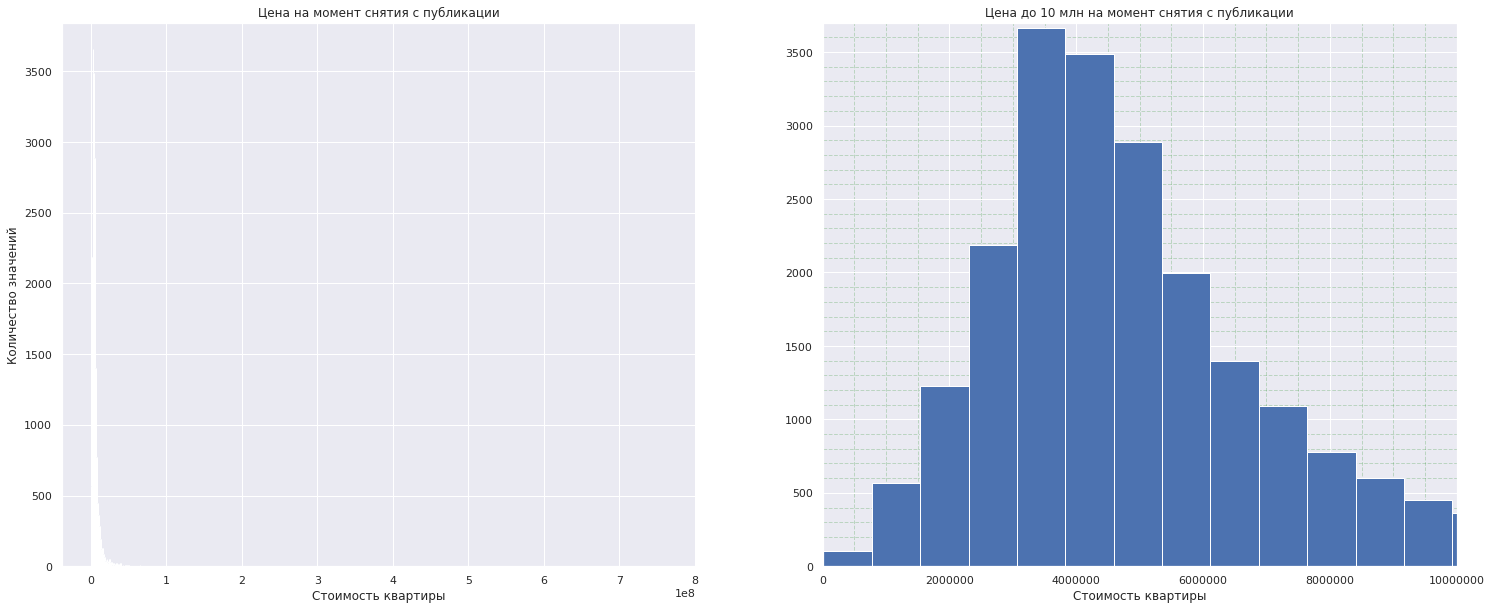

In [34]:
# Строим гистограмму для столбца 'last_price'
hist_plot('last_price', 1000, 'Цена на момент снятия с публикации', 
          'Стоимость квартиры', 10000000, 3700, 'Цена до 10 млн на момент снятия с публикации')

По данным сайта spb.cian.ru, минимальная стоимость квартиры в Ленинградской области —  225,8 тыс. рублей. В данном параметре встречаются  выбивающиеся значения. Ограничим выборку стартовой ценой в 225 000.

In [35]:
data = data.drop(data[data['last_price'] <= 225000].index)

##### **Количество комнат** 

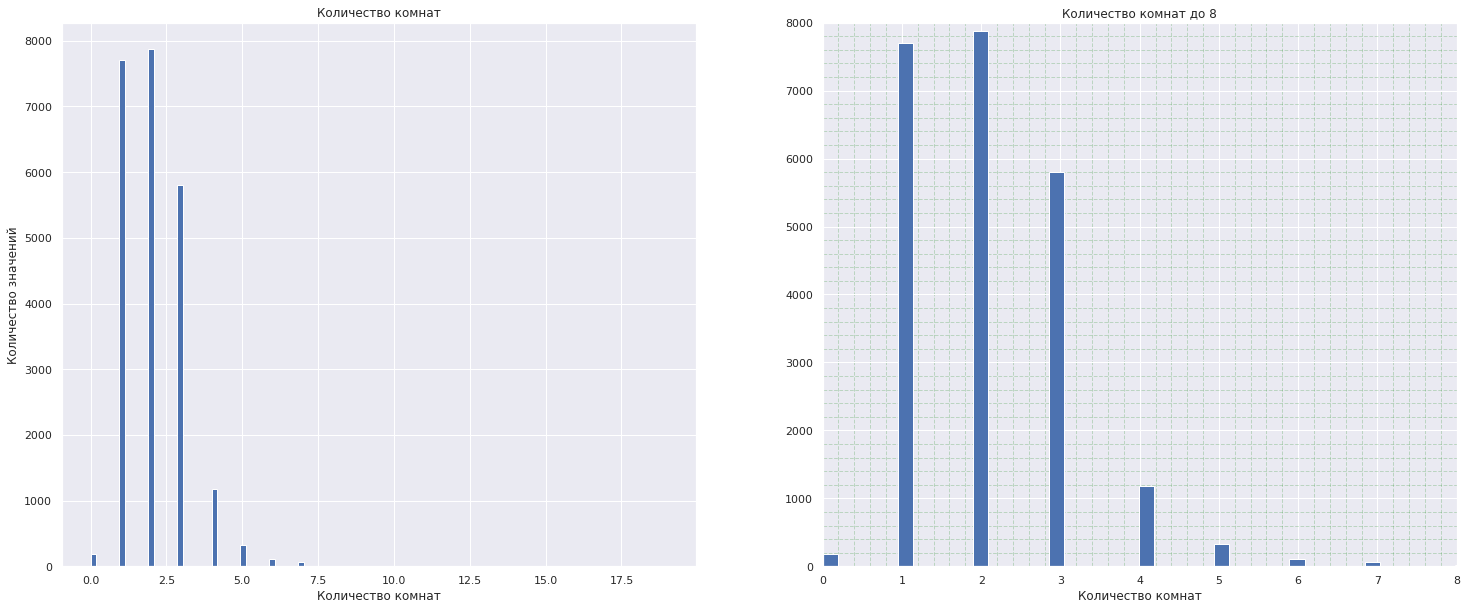

In [36]:
# Строим гистограмму для столбца 'rooms'
hist_plot('rooms', 100, 'Количество комнат', 
          'Количество комнат', 8, 8000, 'Количество комнат до 8')

В данном параметре встречаются аномальные значения - 0 комнат. Ограничим выборку стартовым количеством комнат равное 1.

In [37]:
data = data.drop(data[data['rooms'] < 1].index)

##### **Высота потолков**

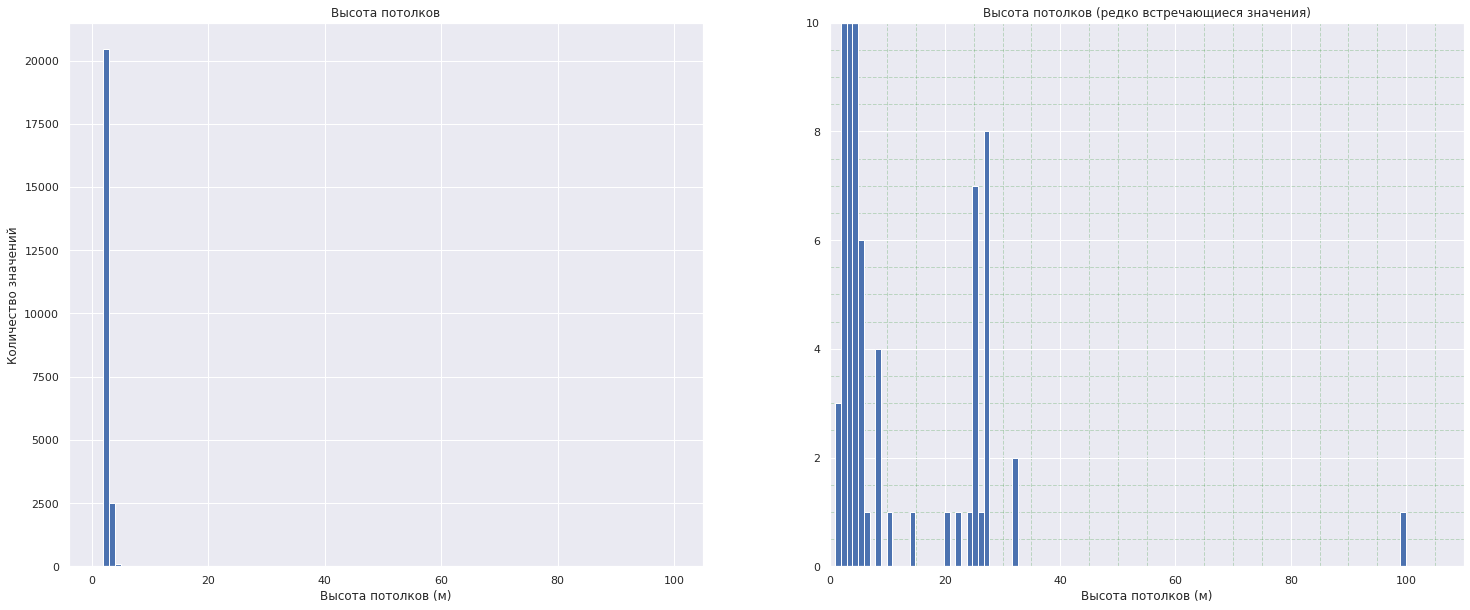

In [38]:
# Строим гистограмму для столбца 'ceiling_height'
hist_plot('ceiling_height', 100, 'Высота потолков', 
          'Высота потолков (м)', 110, 10, 'Высота потолков (редко встречающиеся значения)')

Согласно СНиП 23-01-99 минимальная допустимая высота от пола до чистового потолка в жилых помещениях должна быть не менее 2,5 метра. Ограничим выборку стартовым значением высоты в 2,5 метра.

In [39]:
data = data.drop(data[data['ceiling_height'] < 2.5].index)

В данном параметре очень много выдающихся высоких значений, не соответсвующих действительности. Рассмотрим их попобробнее.

In [40]:
data[data['ceiling_height'] >= 5]['ceiling_height'].sort_values()

1053       5.0
464        5.2
12628      5.3
1026       5.3
7578       5.5
1388       5.6
20264      6.0
17442      8.0
15743      8.0
3474       8.0
5863       8.3
22309     10.3
15061     14.0
17496     20.0
20507     22.6
5076      24.0
14382     25.0
18545     25.0
355       25.0
11285     25.0
9379      25.0
6246      25.0
4643      25.0
5669      26.0
10773     27.0
5807      27.0
17857     27.0
5246      27.0
20478     27.0
21824     27.0
22938     27.0
21377     27.5
3148      32.0
22336     32.0
22869    100.0
Name: ceiling_height, dtype: float64

Логично предположить, что на самом деле повторяющиеся значения от 25 до 32 - вещественные: от 2.5 м до 3.2 м. Остальные значения невозможно подчинить данной логике, поэтому удалим их.

In [41]:
# Преобразуем значения от 25 до 32 в вещественные
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if 25<=x<=32 else x)

In [42]:
# Проверяем результат
data[data['ceiling_height'] >= 5]['ceiling_height'].sort_values()

1053       5.0
464        5.2
12628      5.3
1026       5.3
7578       5.5
1388       5.6
20264      6.0
3474       8.0
15743      8.0
17442      8.0
5863       8.3
22309     10.3
15061     14.0
17496     20.0
20507     22.6
5076      24.0
22869    100.0
Name: ceiling_height, dtype: float64

Законодательно закреплённых правил максимальной высоты потолков в квартирах нет. Однако есть примеры потолков в люкс комплексах, которые достигают 6 м. Оставим это значение в нашей выборке максимальным.

In [43]:
data = data.drop(data[data['ceiling_height'] > 6].index)

##### **Тип этажа квартиры («первый», «последний», «другой»)**

Text(0, 0.5, 'Количество значений')

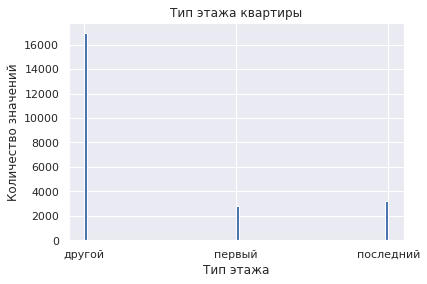

In [44]:
# Строим гистограмму для столбца 'floor_group'
data['floor_group'].hist(bins=100)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество значений')

В данном параметре нет выдающихся значений, оставляем как есть.

##### **Общее количество этажей в доме**

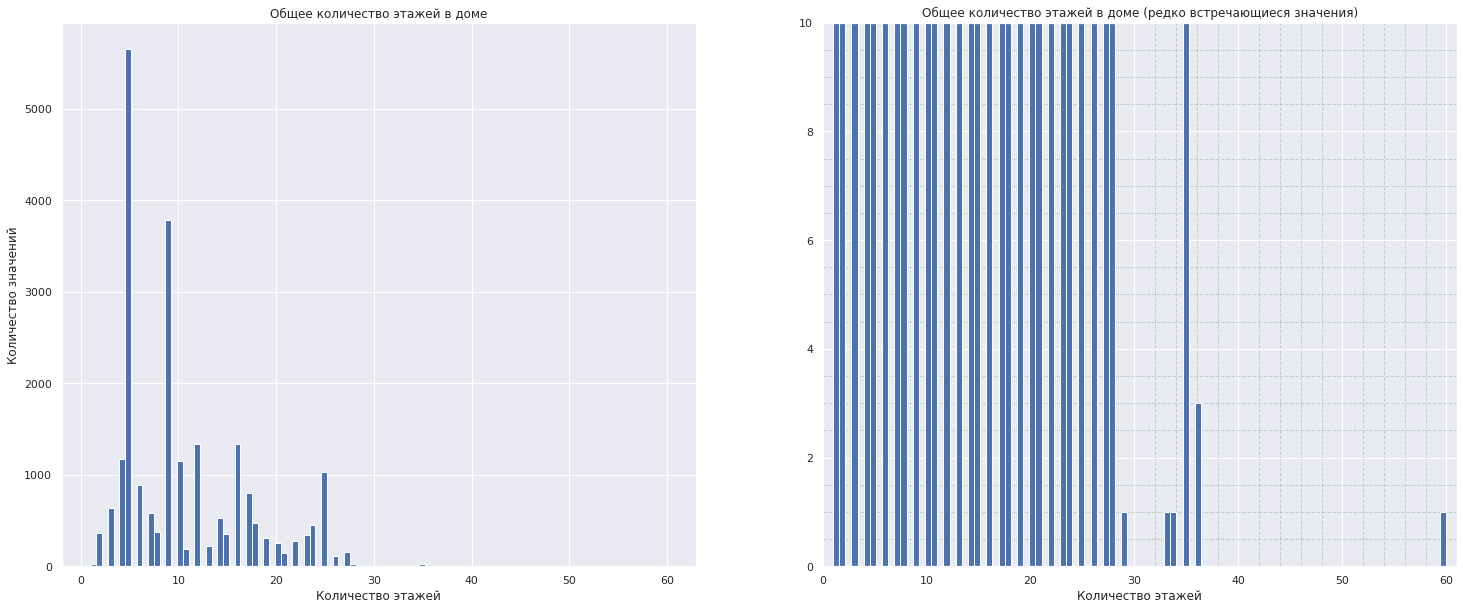

In [45]:
# Строим гистограмму для столбца 'floors_total'
hist_plot('floors_total', 100, 'Общее количество этажей в доме', 
          'Количество этажей', 61, 10, 'Общее количество этажей в доме (редко встречающиеся значения)')

В данном параметре есть высокие выдающиеся значения. Самое высокое жилое здание Спб имеет 36 этажей. Ограничим выборку сверху. 

In [46]:
data = data.drop(data[data['floors_total'] > 36].index)

##### **Расстояние до центра города в метрах**

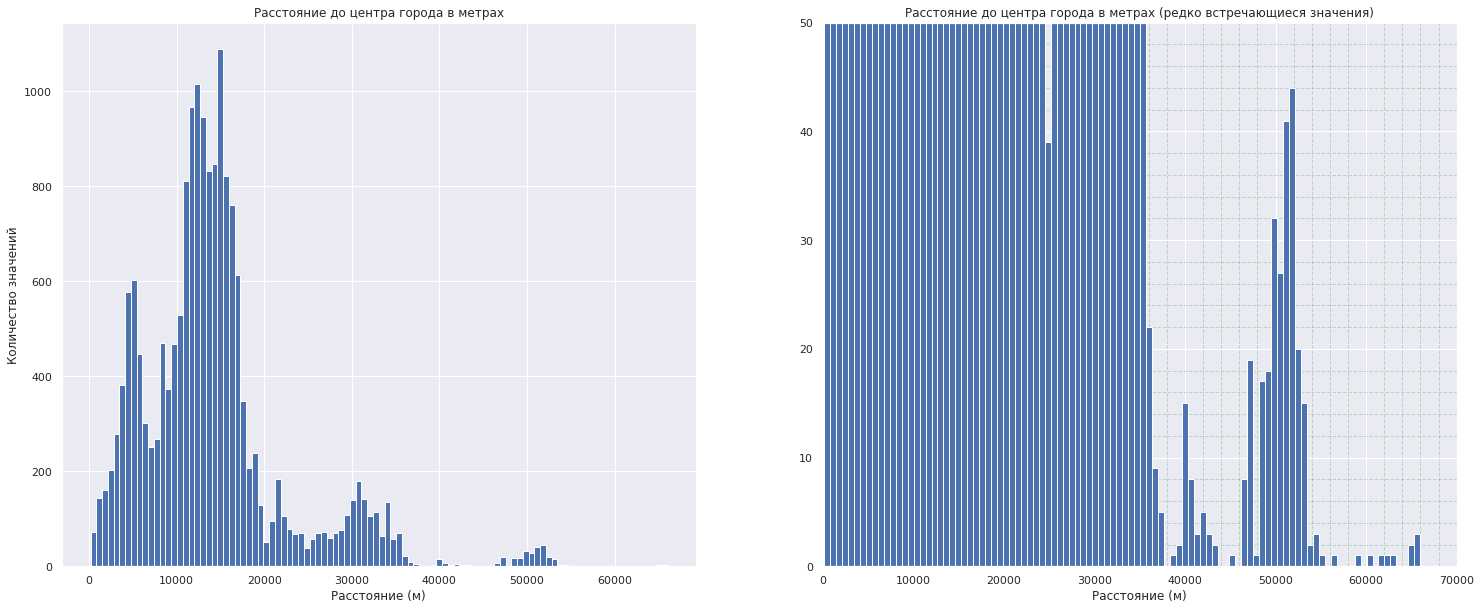

In [47]:
# Строим гистограмму для столбца 'cityCenters_nearest'
hist_plot('cityCenters_nearest', 100, 'Расстояние до центра города в метрах', 
          'Расстояние (м)', 70000, 50, 'Расстояние до центра города в метрах (редко встречающиеся значения)')

В данном параметре нет редких и выбивающихся значений, которые могли бы не соответствовать действительности. По гистограмме можно сделать вывод о том, что больше всего объектов продавалось в районе 10-20 км от центра города.

##### **Расстояние до ближайшего парка**

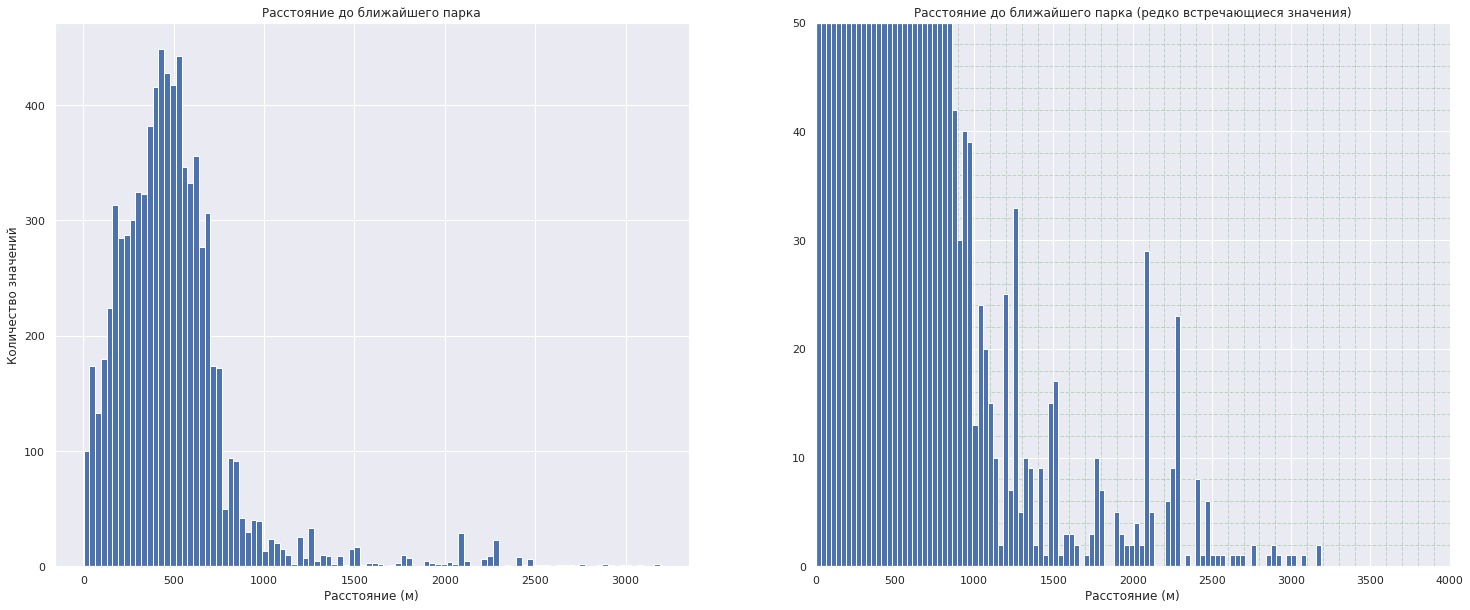

In [48]:
# Строим гистограмму для столбца 'parks_nearest'
hist_plot('parks_nearest', 100, 'Расстояние до ближайшего парка', 
          'Расстояние (м)', 4000, 50, 'Расстояние до ближайшего парка (редко встречающиеся значения)')

В данном параметре нет редких и выбивающихся значений, которые могли бы не соответствовать действительности. По гистограмме можно сделать вывод о том, что больше парков в районе 500м от объекта.

#### **Изучим, как быстро продавались квартиры**

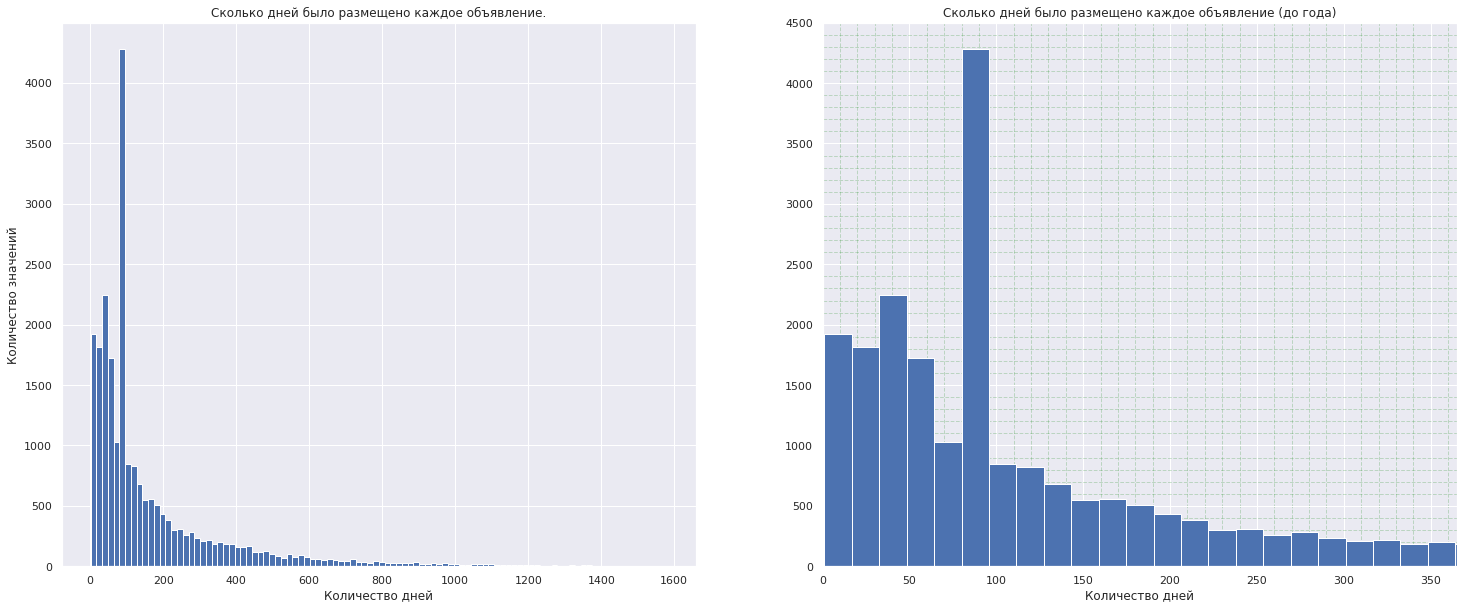

In [49]:
# Строим гистограмму для столбца 'days_exposition'
hist_plot('days_exposition', 100, 'Сколько дней было размещено каждое объявление.', 
          'Количество дней', 365, 4500, 'Сколько дней было размещено каждое объявление (до года)')

In [50]:
data['days_exposition'].describe()

count    22997.000000
mean       170.318911
std        207.587578
min          1.000000
25%         46.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно продажа занимает около **95 дней**. Продажи **меньше 50 дней** можно считать быстрыми, а необычно долгими - продажи **больше, чем 200 дней.**

#### **Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.**

**Изучим, зависит ли цена от:**

- общей площади;
  
- жилой площади;

- площади кухни;

- количества комнат;

- этажа, на котором расположена квартира (первый, последний, другой);

- даты размещения (день недели, месяц, год).


In [51]:
# Напишем функцию для визуализации непрерывных величин: площади (общей, жилой, кухонной)
def plot_pivot(index, title, xlabel, kind='bar'):
    pivot = data.pivot_table(index=index, values='last_price')
    if kind == 'scatter':
        fig, ax = plt.subplots(figsize=(25,10))
        ax.scatter(pivot.index, pivot['last_price'])
    if kind == 'bar':
        pivot.plot(kind=kind, figsize=(25,10))
    plt.ticklabel_format(axis = 'y', style = 'plain')
    plt.grid(True, linestyle='--', color='green', alpha=0.2, which='minor')
    plt.minorticks_on()
    plt.tick_params(which='minor')
    plt.title(f'Зависимость цены от {title}')
    plt.ylabel('Цена')
    plt.xlabel(xlabel)
    

##### **Зависимость цены от общей площади**

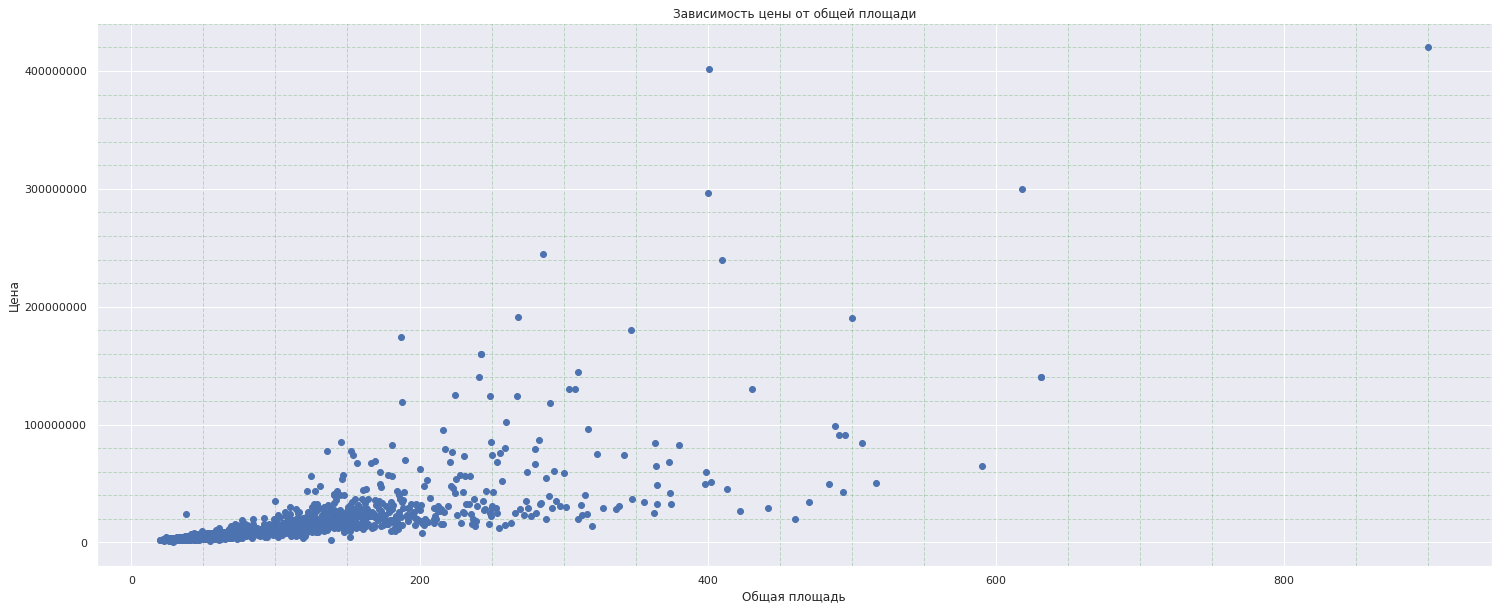

In [52]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('total_area', 'общей площади', 'Общая площадь','scatter')

In [53]:
# Рассчитаем коэффициент корреляции
correlation = data.corr()
correlation.loc['last_price']['total_area']

0.65335795792563

Корреляция сильная положительная.

##### **Зависимость цены от жилой площади**

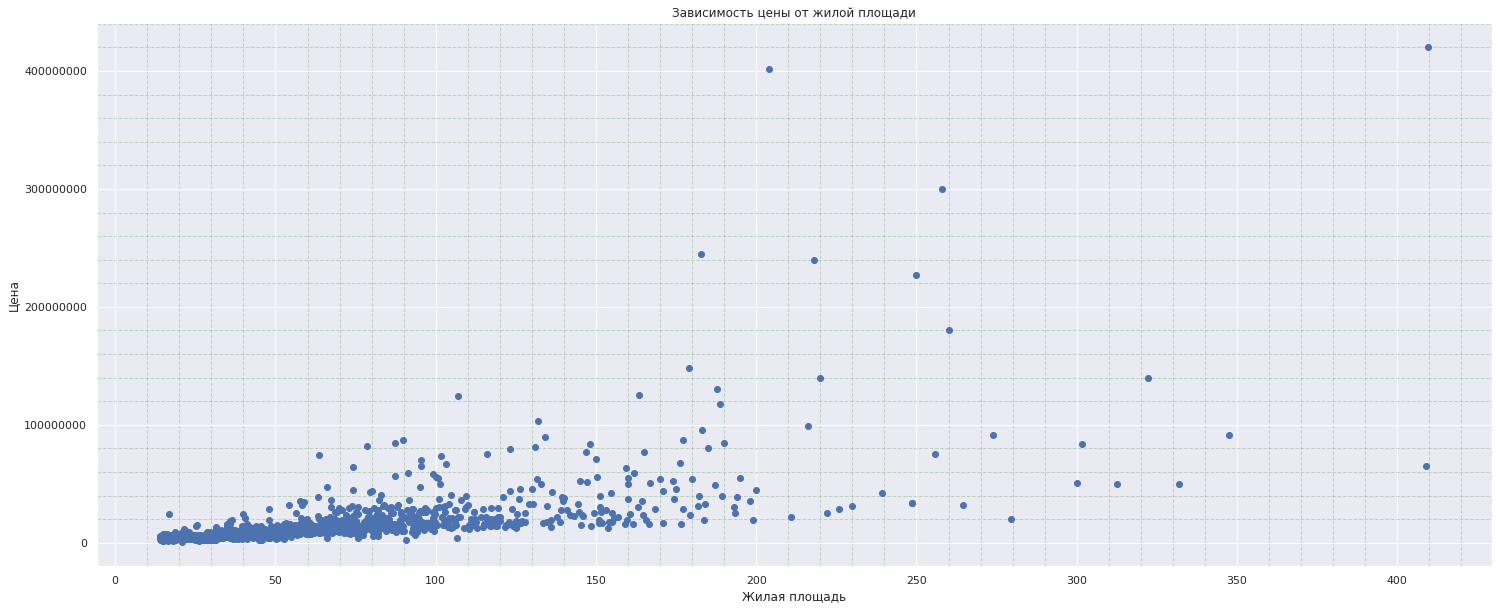

In [54]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('living_area', 'жилой площади', 'Жилая площадь', 'scatter')

In [55]:
# Рассчитаем коэффициент корреляции
correlation.loc['last_price']['living_area']

0.542084351702491

Корреляция сильная положительная.

##### **Зависимость цены от площади кухни**

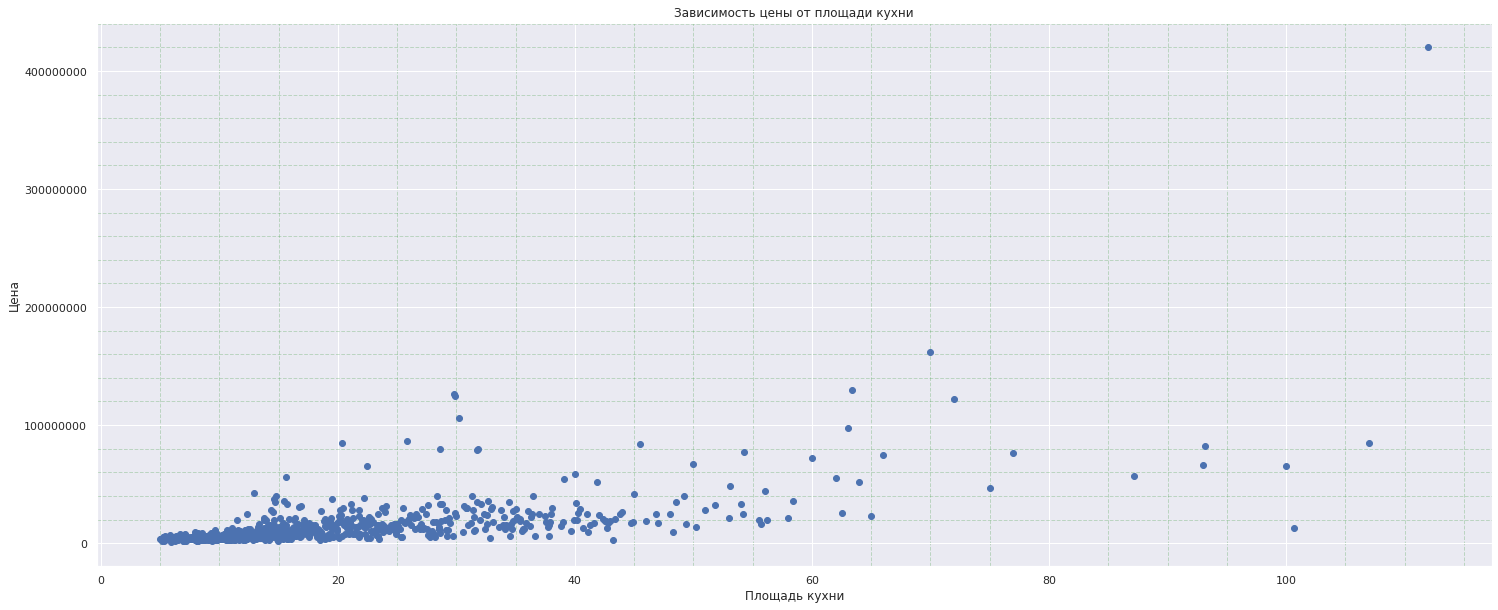

In [56]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('kitchen_area', 'площади кухни', 'Площадь кухни', 'scatter')

In [57]:
# Рассчитаем коэффициент корреляции
correlation.loc['last_price']['kitchen_area']

0.44479312682662925

Корреляция слабая.

Зависимость от площади мы рассматривали как зависимость от непрерывной величины, поэтому использовали график в виде точек. Далее мы будем рассматривать дискретные величины, поэтому построим гистограммы.

##### **Зависимость цены от количества комнат**

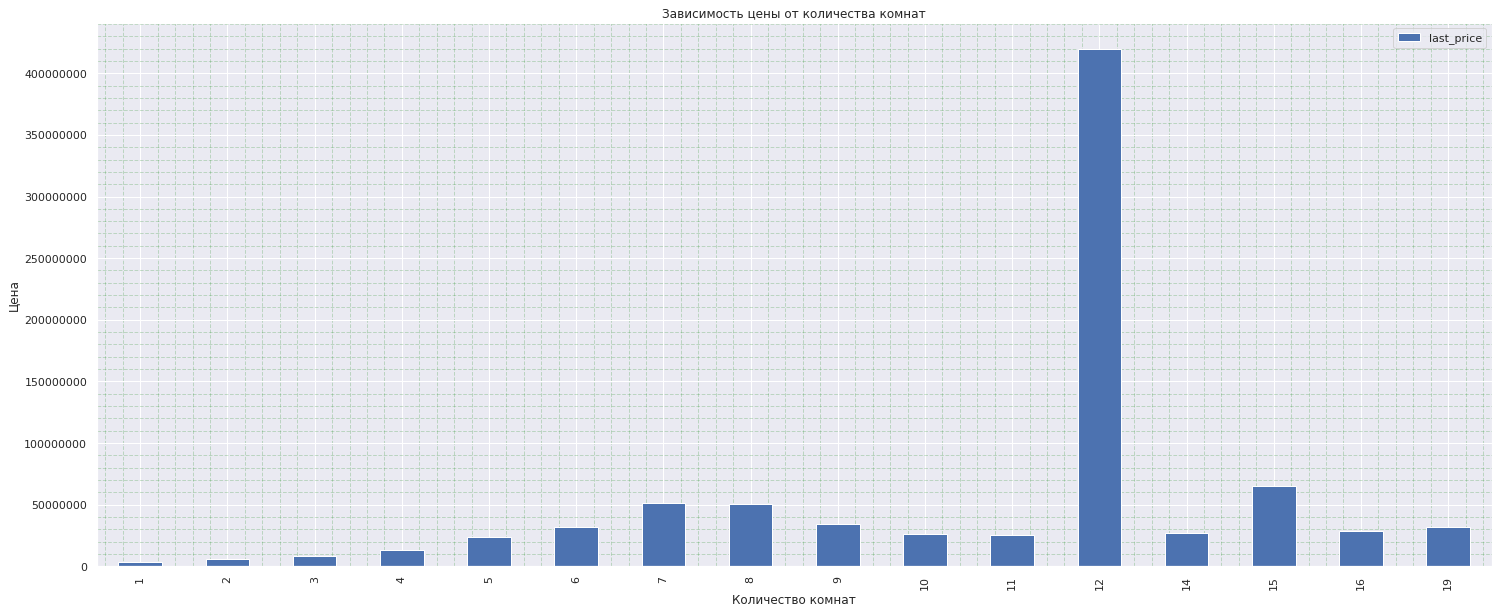

In [58]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('rooms', 'количества комнат', 'Количество комнат')

##### **Зависимость цены от этажа, на котором расположена квартира**

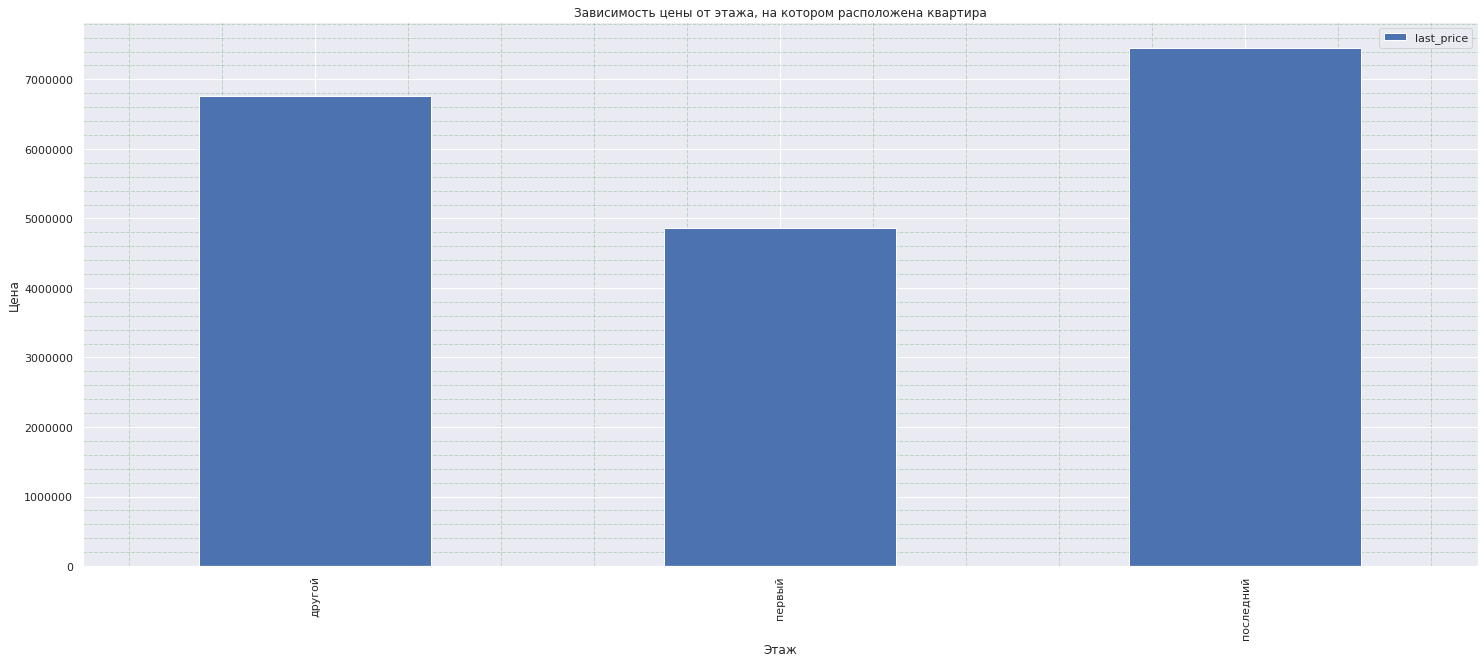

In [59]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('floor_group', 'этажа, на котором расположена квартира', 'Этаж')

##### **Зависимость цены от даты размещения**

Построим зависимость для дней недели.

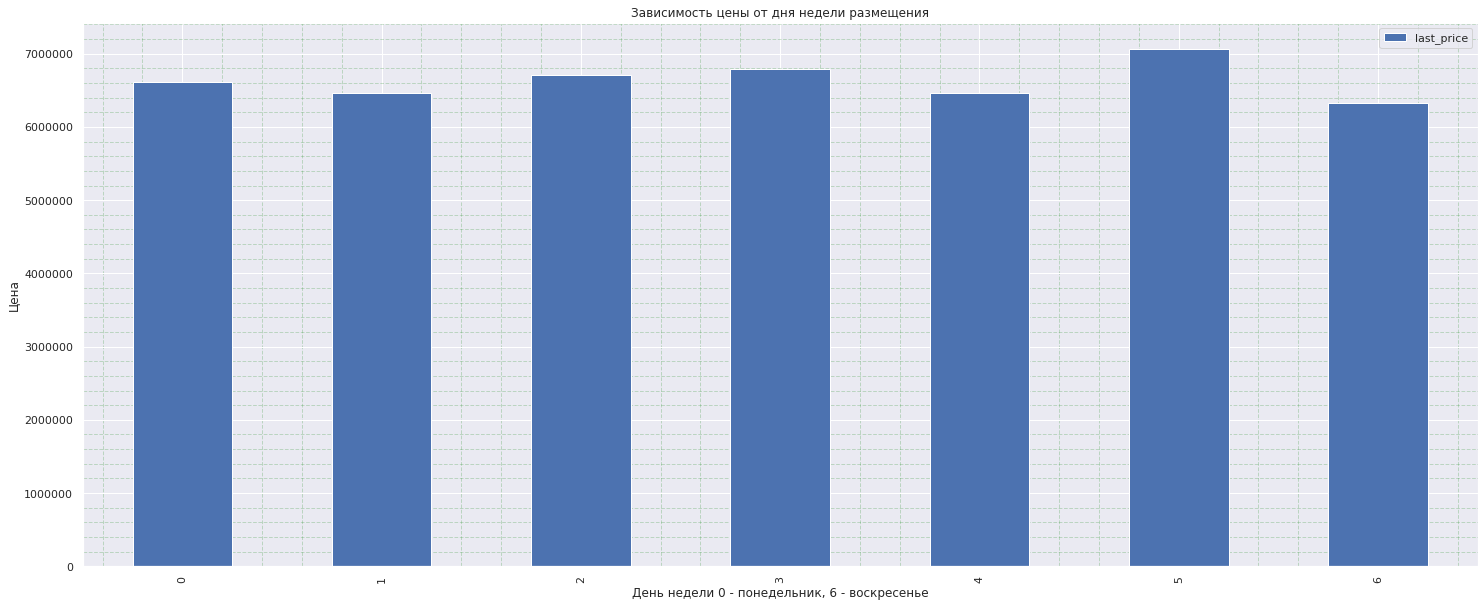

In [60]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('first_day_exposition_weekday', 'дня недели размещения', 'День недели 0 - понедельник, 6 - воскресенье')

Построим зависимость от месяца.

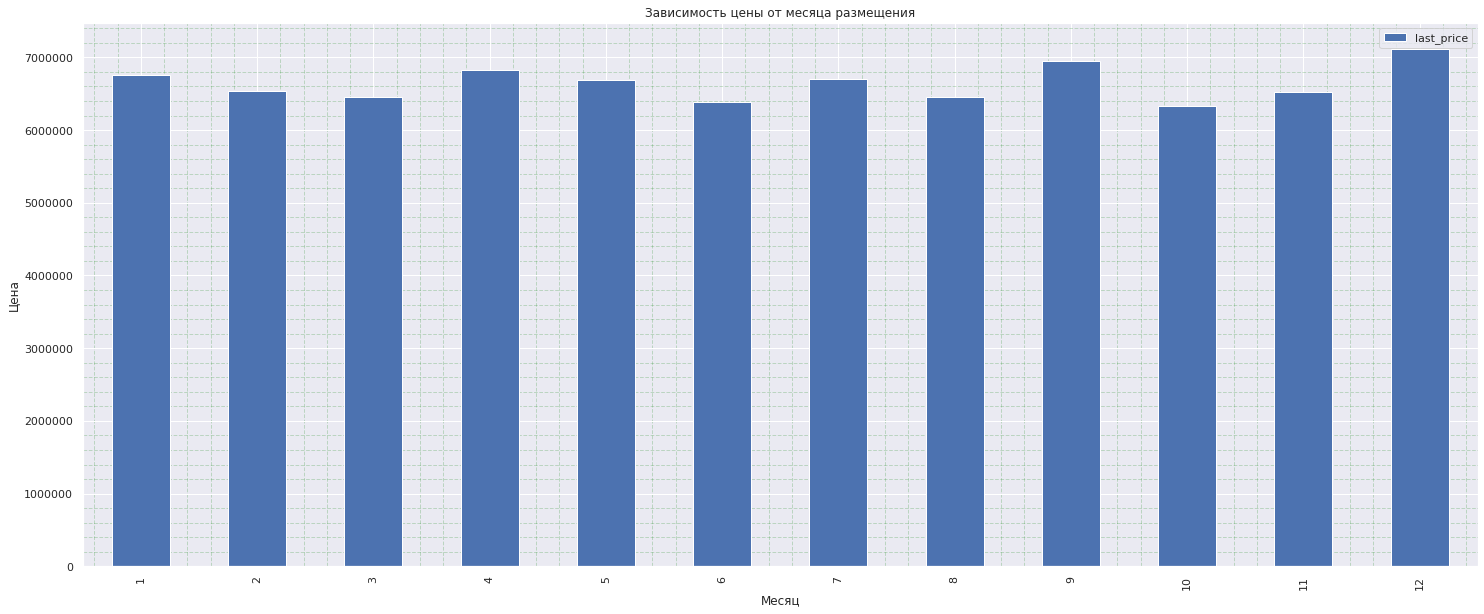

In [61]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('first_day_exposition_month', 'месяца размещения', 'Месяц')

Построим зависимость от года.

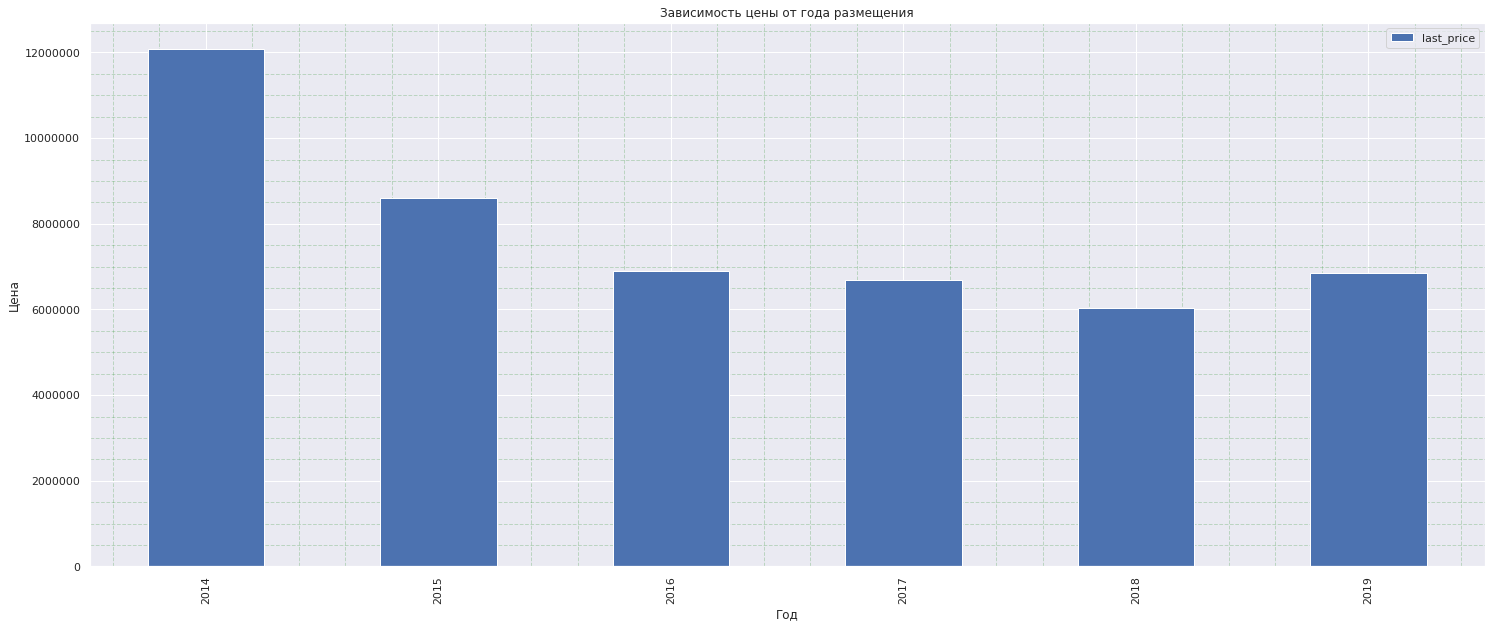

In [62]:
# Подготовим данные для визуализации и построим график с помощью функции plot_pivot()
plot_pivot('first_day_exposition_year', 'года размещения', 'Год')

**Вывод**: больше всего на стоимость квартиры влияют следующие факторы: жилая и общая площадь, количество комнат, этаж и год размещения объявления.

#### **Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [63]:
# Формируем сводную таблицу по средней цене и количеству объявлений
df_one_square_meter = data.pivot_table(index='locality_name', values='one_square_meter_price', aggfunc=['count','median'])
df_one_square_meter.index.names = ['Название населенного пункта']
df_one_square_meter.columns = ['Количество объявлений', 'Медианная цена квадратного метра']

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [64]:
df_one_square_meter.sort_values(by='Количество объявлений', ascending=False).head(10)

,Количество объявлений,Медианная цена квадратного метра
Название населенного пункта,,
Санкт-Петербург,15335,104444.0
Мурино,537,84375.0
Кудрово,442,95555.0
п. Шушары,421,75949.0
Всеволожск,384,65737.5
Пушкин,361,99987.0
Колпино,335,74725.0
п. Парголово,302,91243.5
Гатчина,301,67927.0


Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург, у него же самое большое число объявлений. Самая низкая стоимость квадратного метра в Выборге, у него же самое низкое число объявлений.

##### **Опишем, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга**

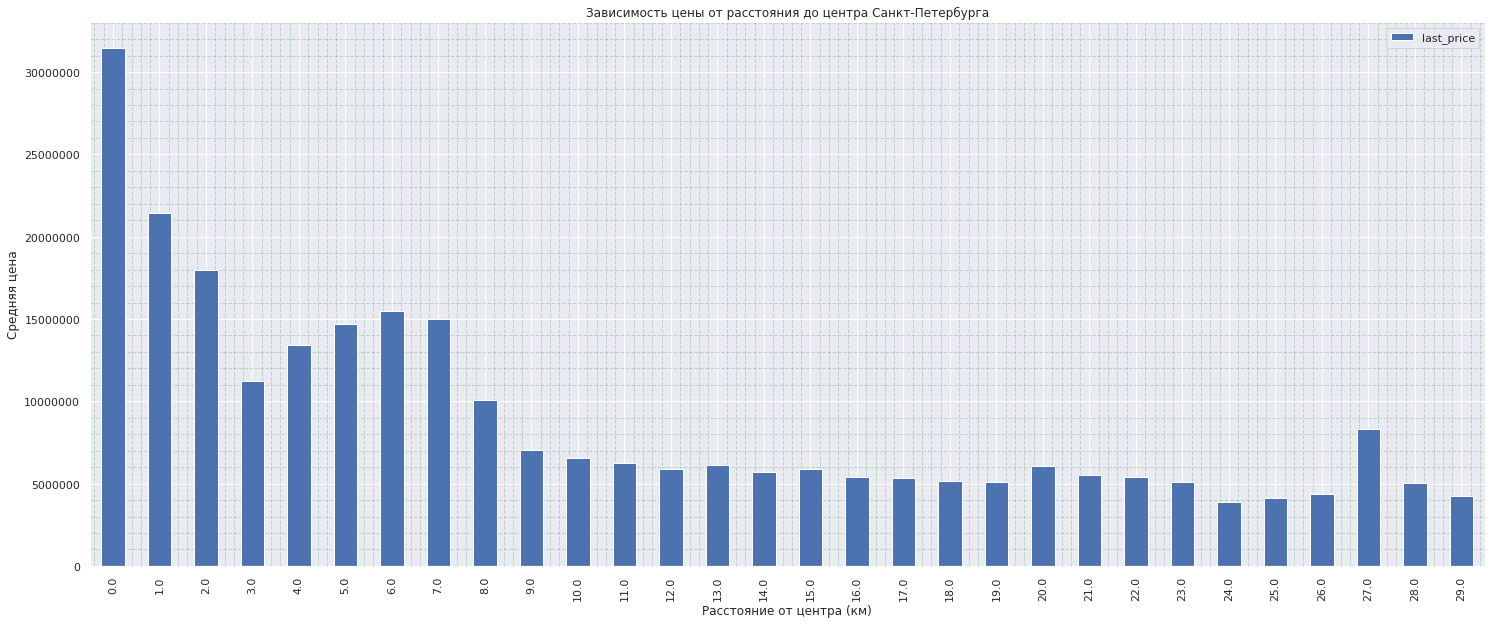

In [66]:
spb = data.query('locality_name == "Санкт-Петербург"')
(spb
     .pivot_table(index='cityCenters_nearest_km',values='last_price')
     .plot(kind='bar', figsize=(25,10))
)
plt.grid(True, linestyle='--', color='green', alpha=0.2, which='minor')
plt.minorticks_on()
plt.tick_params(which='minor')
plt.ticklabel_format(axis = 'y',style = 'plain')
plt.title('Зависимость цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Средняя цена')
plt.xlabel('Расстояние от центра (км)');

**Вывод:** Стоимость объектов зависит от расстояния до центра города в пределах 10 км, дальше средняя цена примерно однородна.

### Выводы

Таким образом мы провели исследование данных по архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет и выполнили поставленные цели:
1. Определили рыночную стоимость объектов недвижимости. 
2. Установили параметры, влияющие на цену объектов. 
3. Построили автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

Для этого были выполнены следующие действия:

- Открыт файл с данными и изучена общая информация: всего в нашем датасете было 23699 строк и 22 столбца, данные имели пропущенные значения.


- Выполнена предобработка данных: 
    определили, в каких столбцах есть пропуски, заполнили пропущенные значения там, где это возможно; 
    
    нашли столбцы, в которых нужно изменить тип данных и преобразовали их в нужных столбцах; 
    
    изучили явные дубликаты в датасете, неявные в названиях населенных пунктов и заменили их.
    

- Добавили в таблицу новые столбцы со следующими параметрами: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.


- Провели исследовательский анализ данных: 
    обработали аномалии в столбцах;
    
    изучили, как быстро продавались квартиры - в среднем 95 дней;
    
    определили факторы, которые больше всего влияют на общую (полную) стоимость объекта - жилая и общая площадь, количество комнат, этаж и год размещения объявления;
    
    посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений - выяснили, что самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге;
    
    оценили, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга -  зависит пределах 10 км, дальше средняя цена примерно однородна.